In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [27]:
#!pip install plotly

In [28]:
import plotly.express as px

In [29]:
import sys
sys.path.append('src')

In [30]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [31]:
input_file = "Input files/SQ60_DMSO_TMT_10ppm.csv"

In [32]:
columns_keep = ['proteins', 'adj_p', 'log2FC']

In [33]:
processed_df = pd.read_csv(input_file, usecols = columns_keep)

In [34]:
highlight_genes = ['sp|O60885|BRD4_HUMAN']
processed_df['highlight'] = processed_df['proteins'].apply(lambda x: x if x in highlight_genes else 'other')

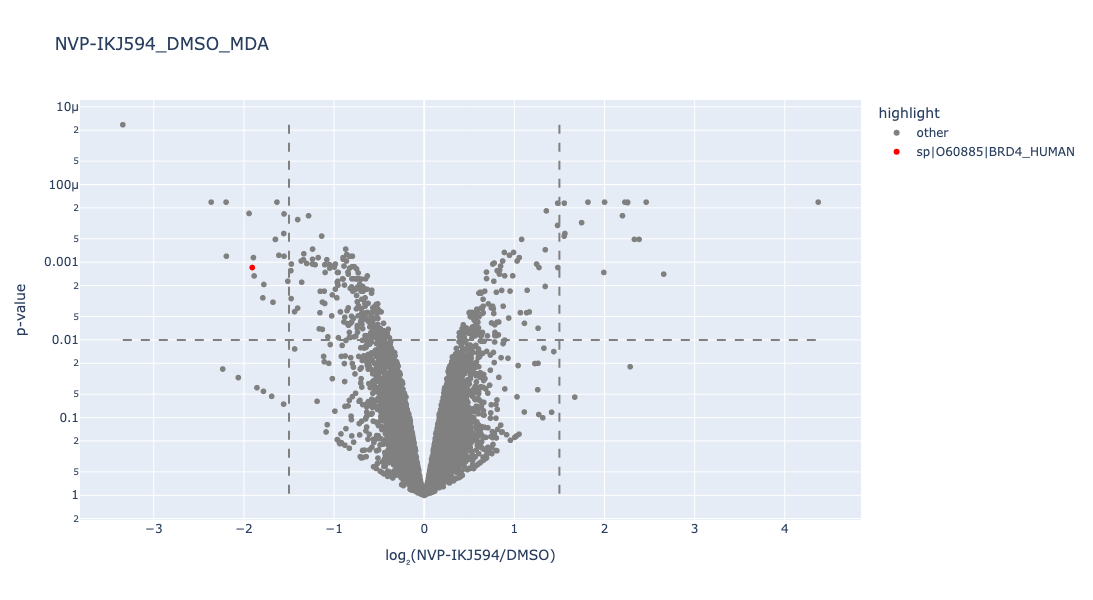

In [38]:
min_p = processed_df['adj_p'].min()
max_p = processed_df['adj_p'].max()

fig = px.scatter(processed_df, x = 'log2FC', y = 'adj_p', hover_name = 'proteins',
                 title = 'NVP-IKJ594_DMSO_MDA', color='highlight',
    color_discrete_map={
        'sp|O60885|BRD4_HUMAN': 'red',
        'other': 'gray'
    },labels={
        'log2FC': 'log₂(NVP-IKJ594/DMSO)',
        'adj_p': 'p-value'})
fig.update_yaxes(type='log', autorange='reversed')  # reverse so small p-values appear at top

fig.add_shape(type="line", x0=1.5, x1=1.5, y0=min_p, y1=max_p,
              line=dict(color="gray", dash="dash"))

fig.add_shape(type="line", x0=-1.5, x1=-1.5, y0=min_p, y1=max_p,
              line=dict(color="gray", dash="dash"))

fig.add_shape(type="line", x0=processed_df['log2FC'].min(), x1=processed_df['log2FC'].max(),
              y0=0.01, y1=0.01,
              line=dict(color="gray", dash="dash"))

fig.update_layout(
    autosize=False,
    width=800,
    height=600)

fig.show()

In [36]:
row = processed_df[processed_df['proteins']== 'sp|Q9BV68|RN126_HUMAN']

In [37]:
row

,proteins,adj_p,log2FC,highlight
